In [9]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
from matplotlib.lines import Line2D
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

In [10]:
sns.set_style('ticks')
sns.set_context('notebook')

outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
iters = np.arange(10,7210,10)
levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels, iters=iters)

In [11]:
nx = 512
ny = 612
nz = 100
depth = ds.Depth[:]
LAT = ds['YC'][:]
LON = ds['XC'][:]-360
lat = ds.YC[:,0].data
lon = ds.XC[0,:].data-360

Z = ds['Z'][:]
Zl = ds['Zl'][:]

# centers mask
hFacC = ds['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth,0)
mask_dep = np.ma.getmask(dep_masked)

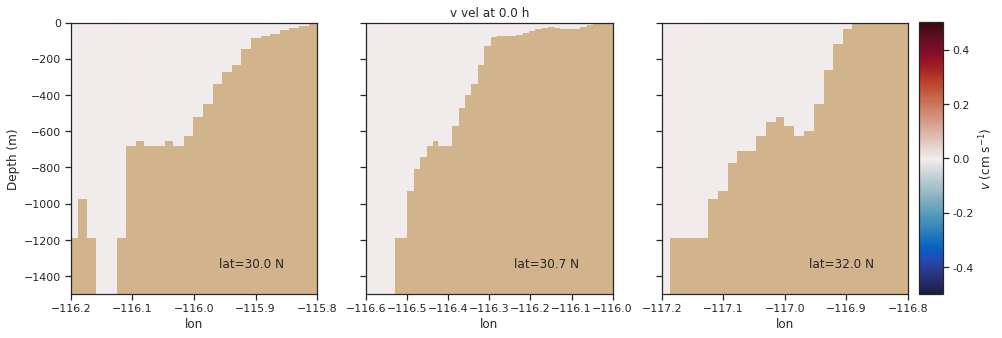

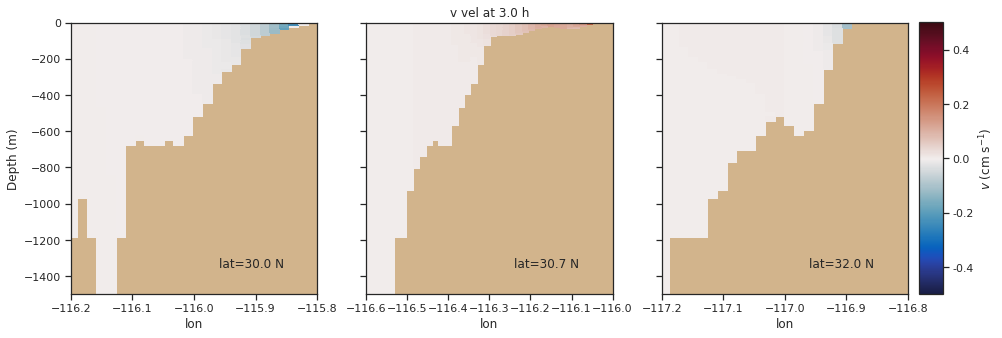

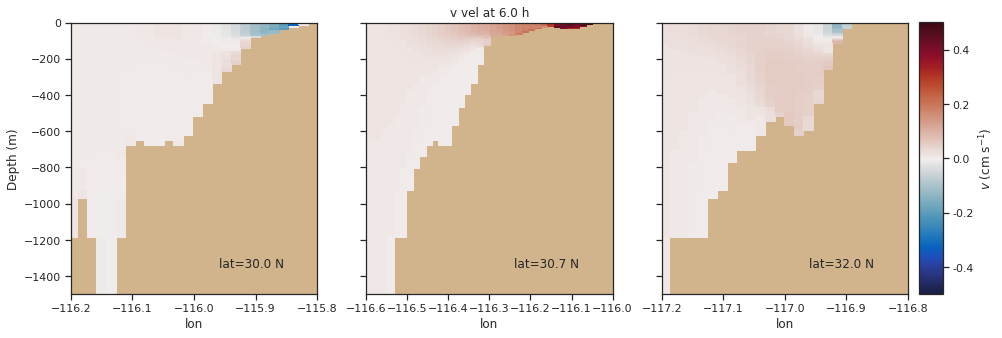

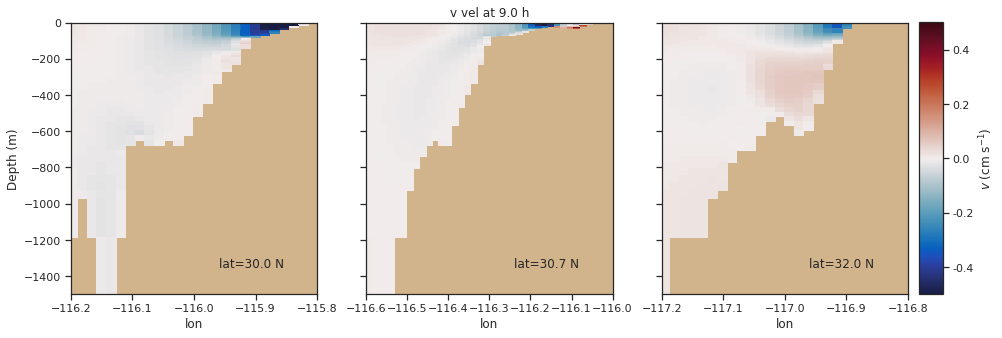

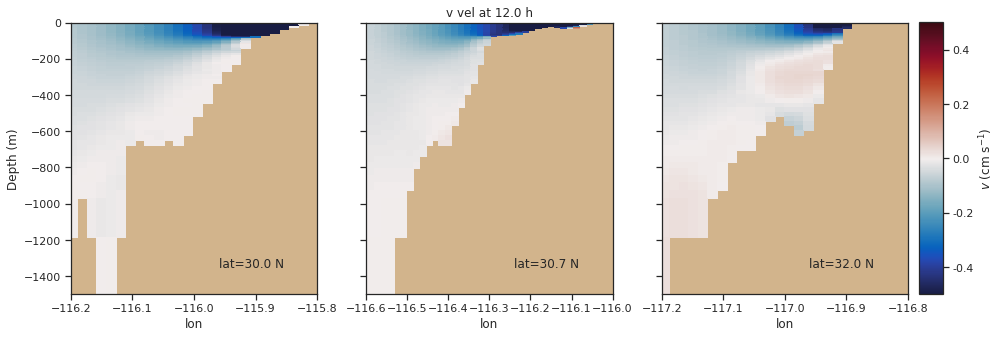

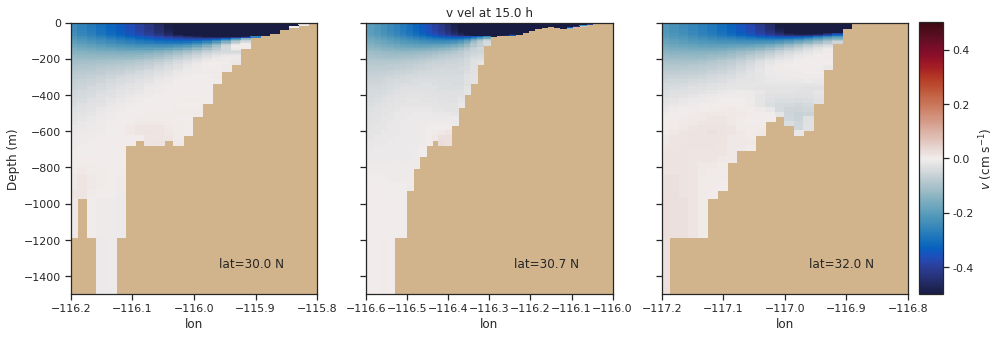

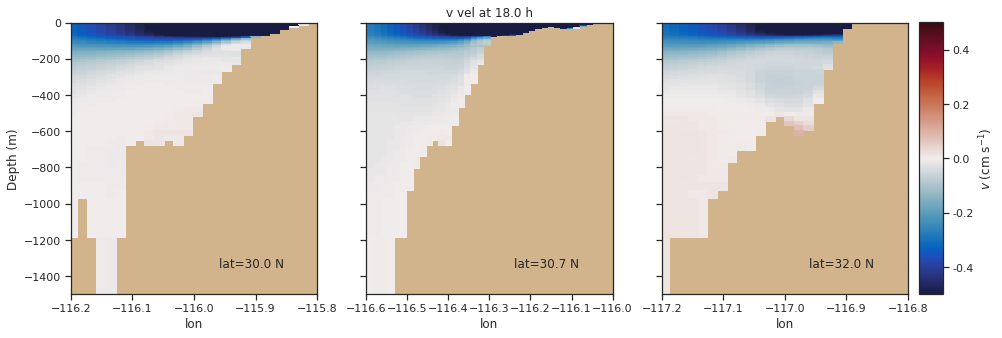

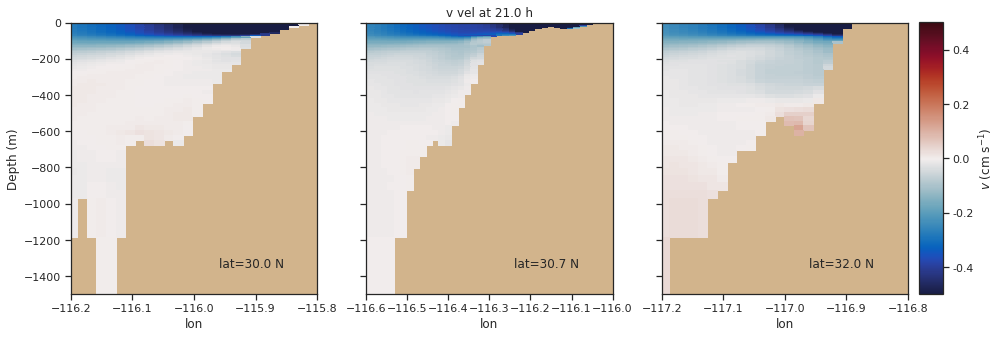

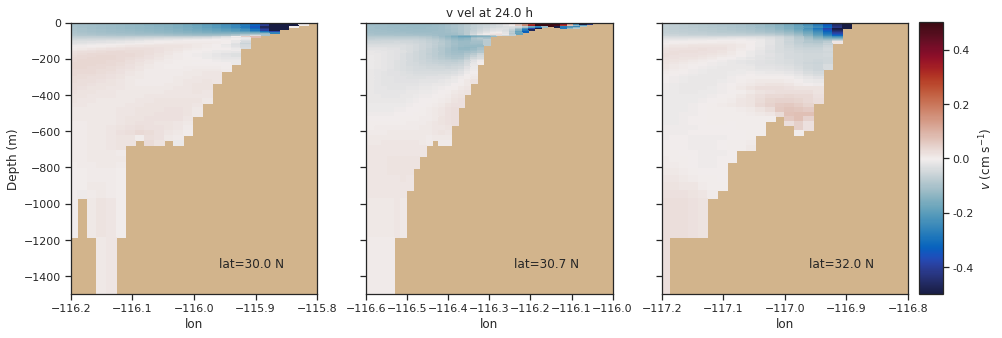

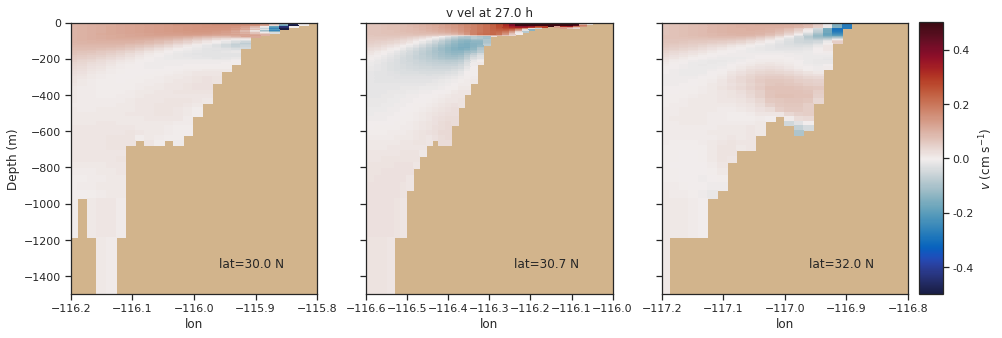

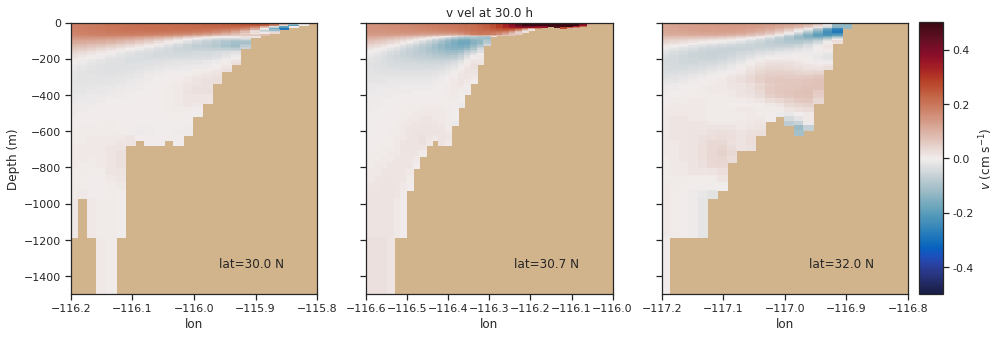

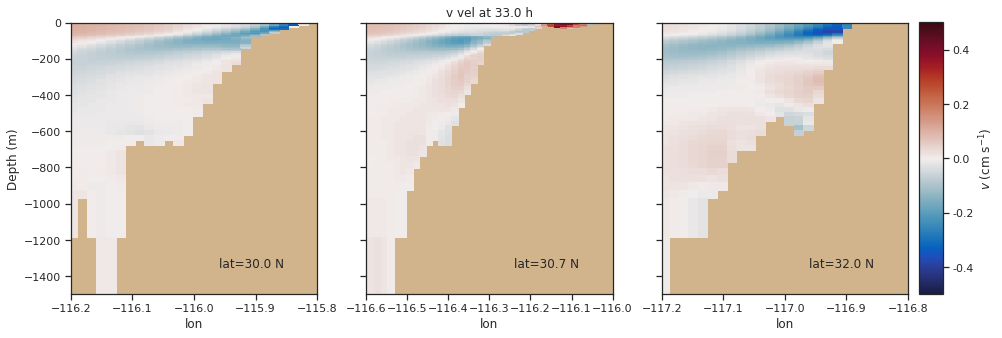

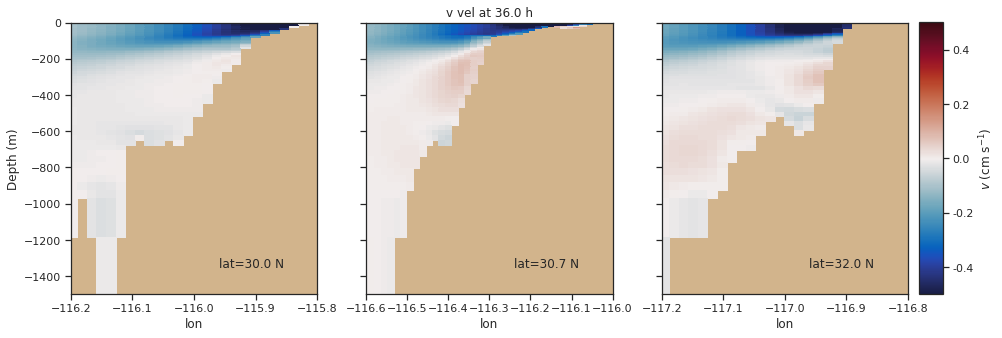

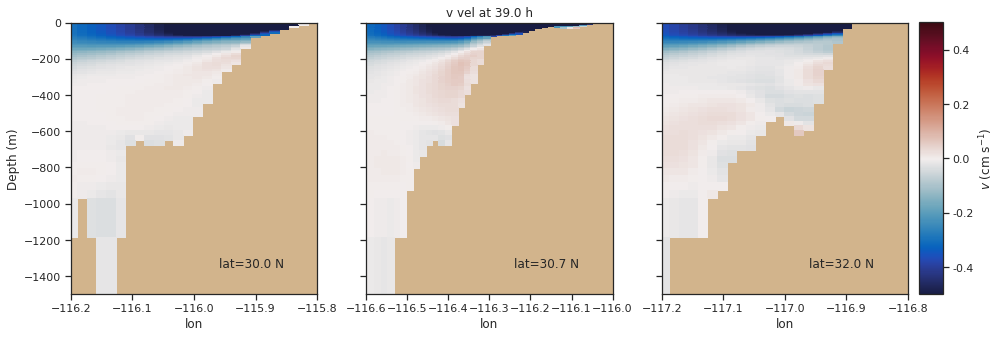

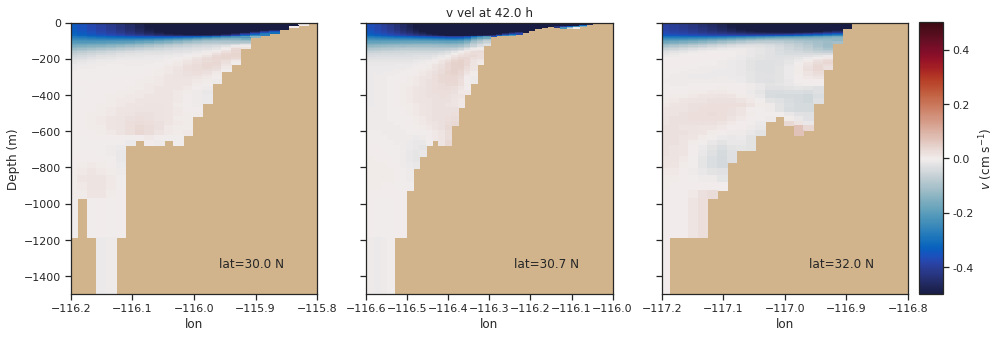

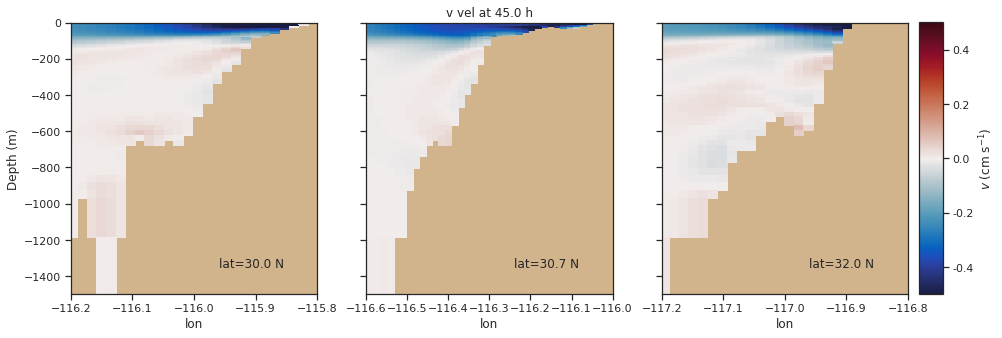

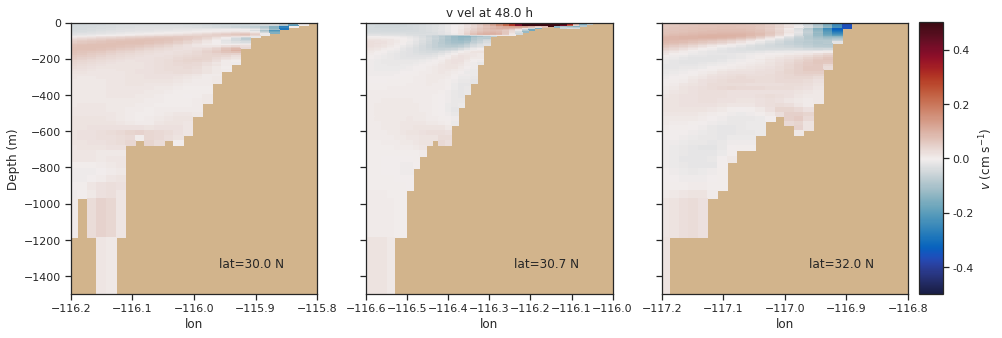

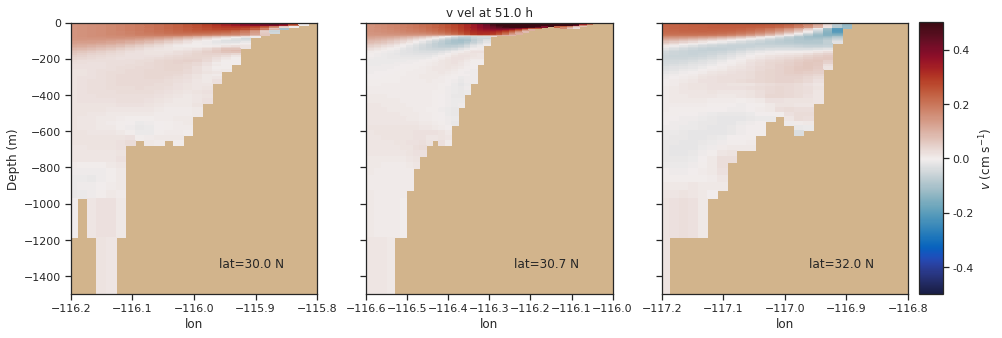

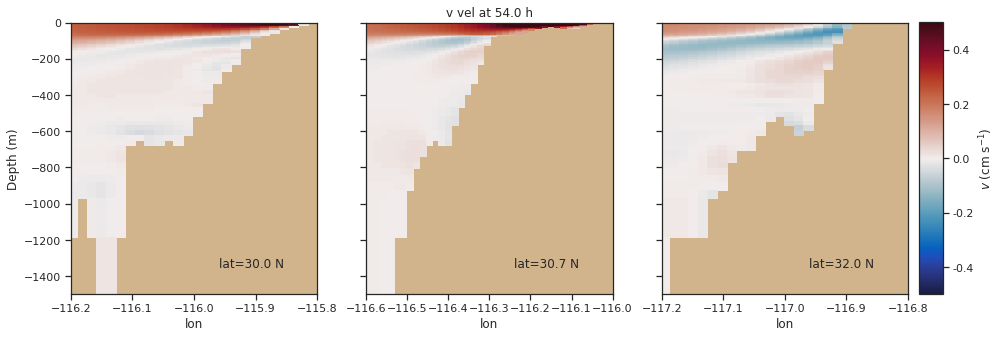

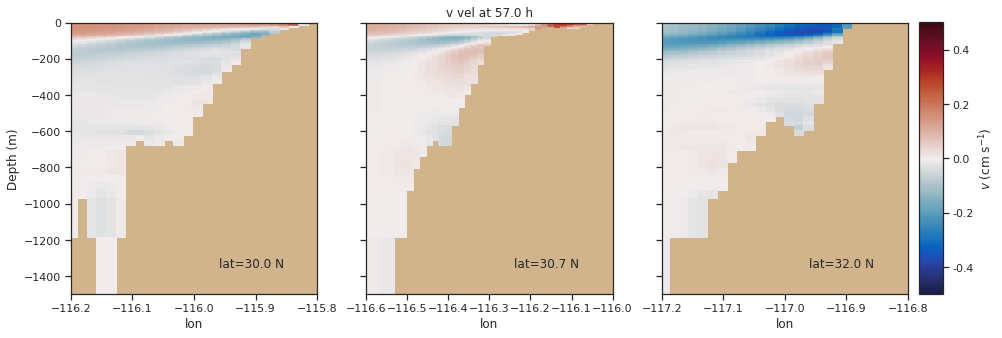

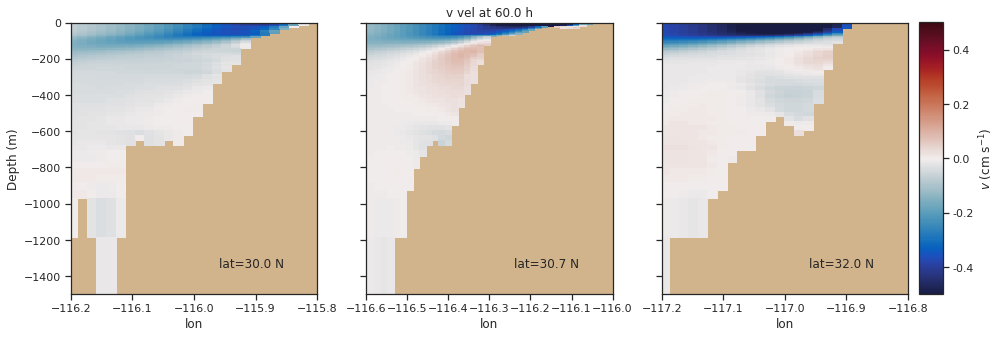

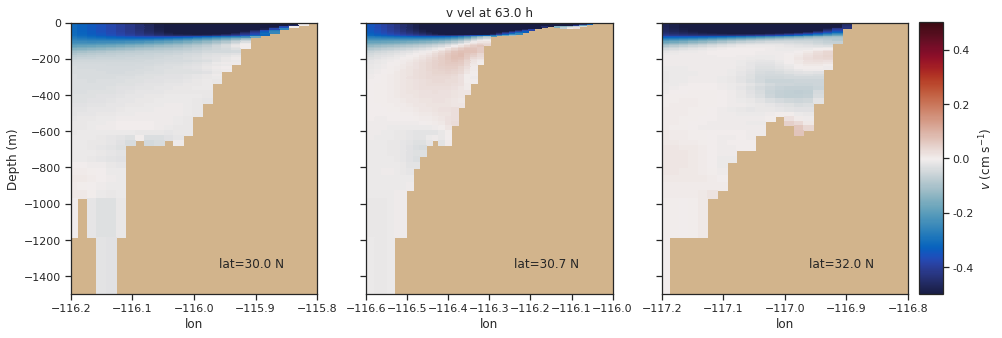

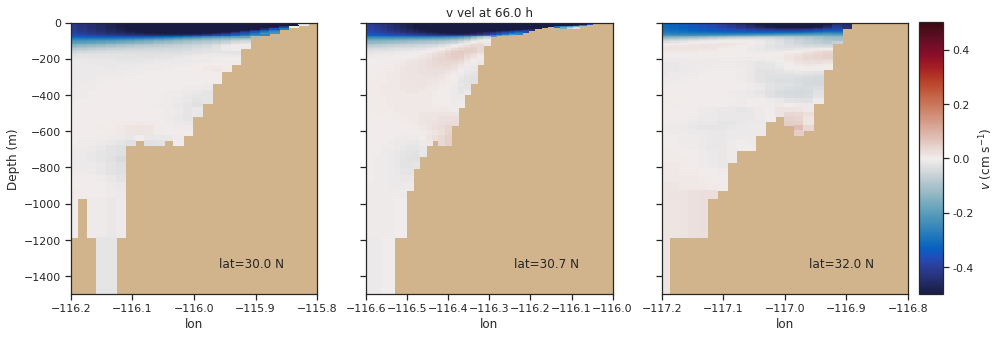

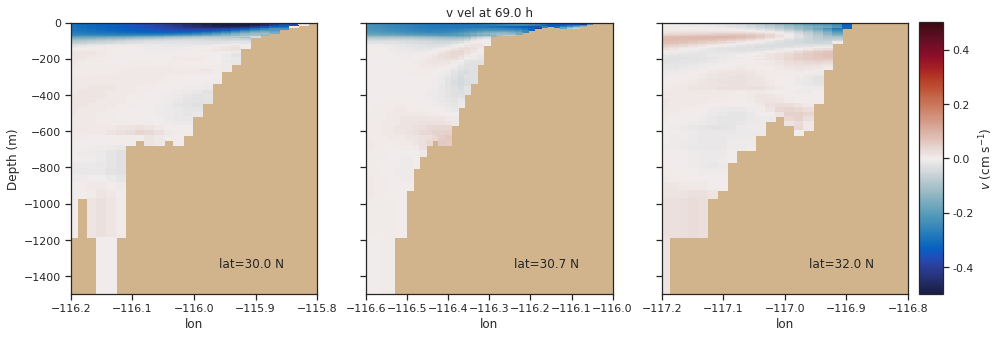

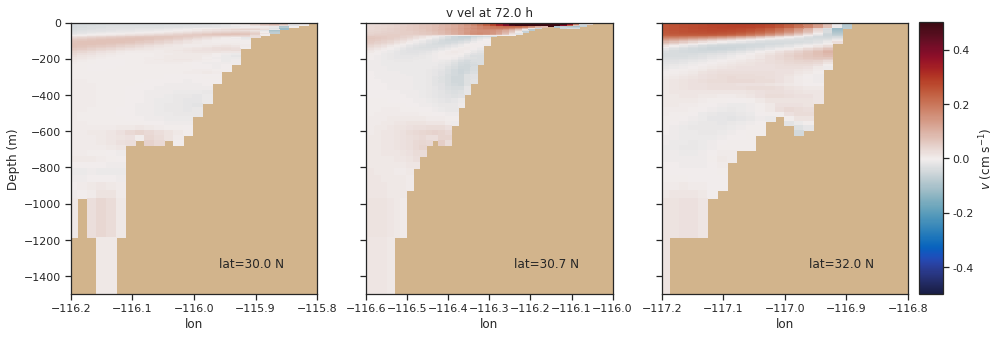

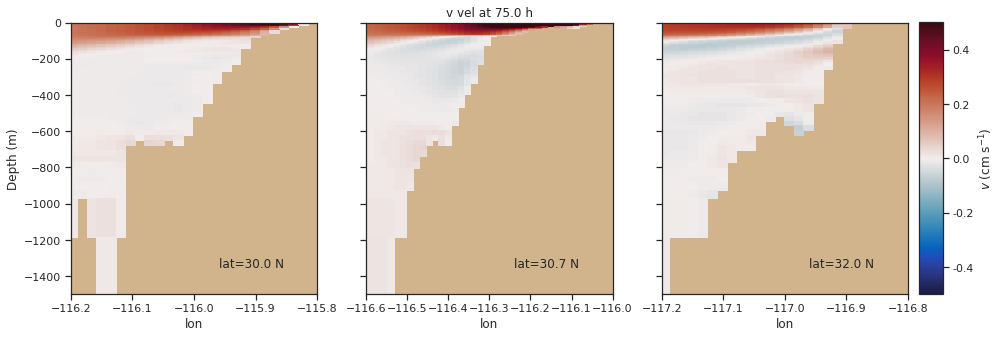

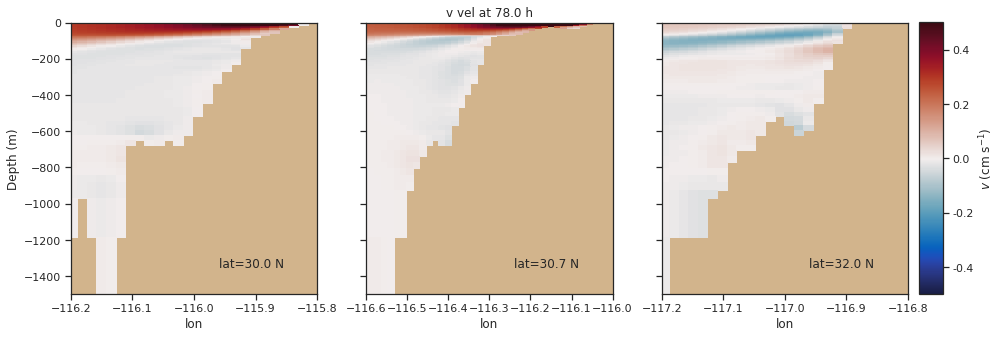

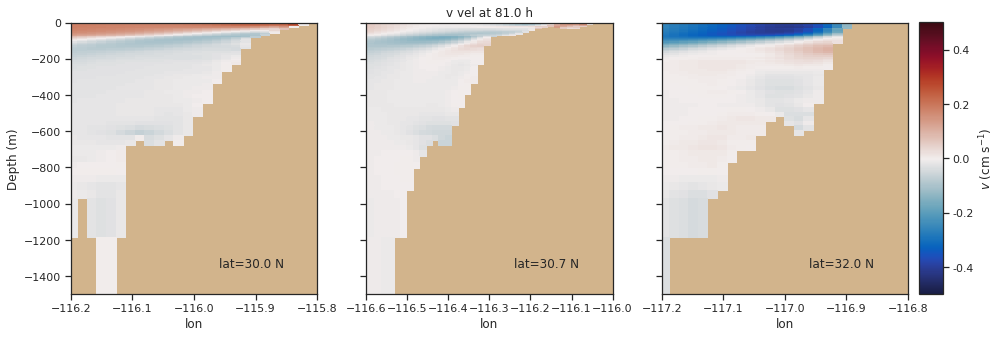

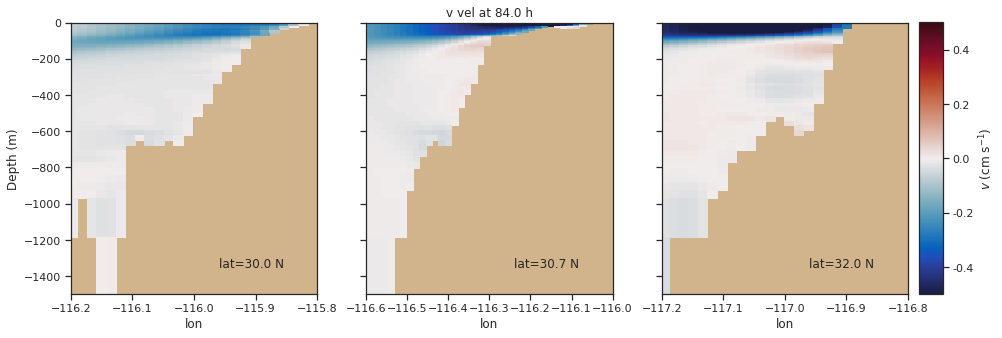

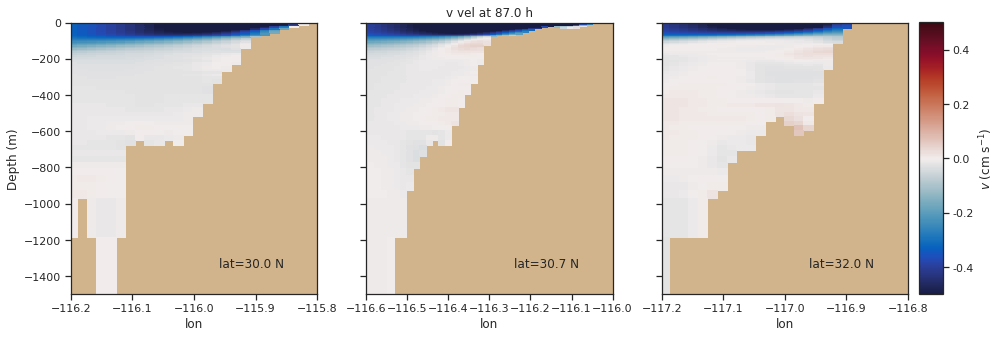

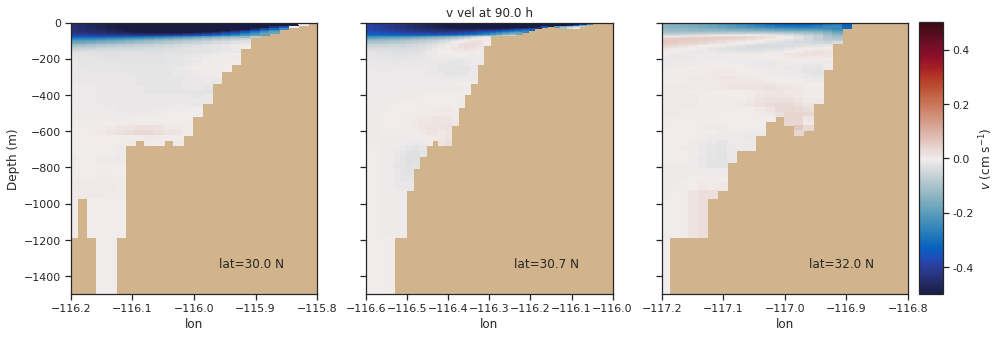

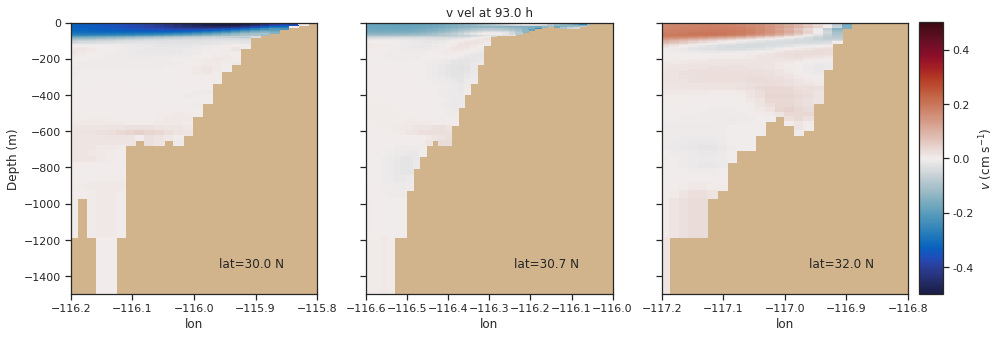

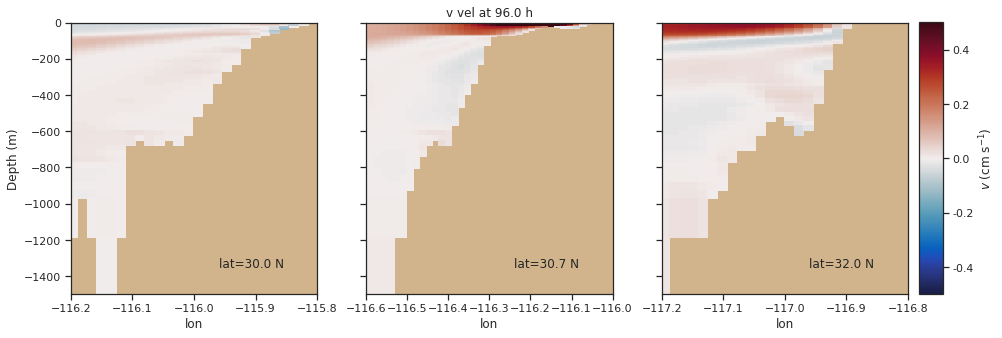

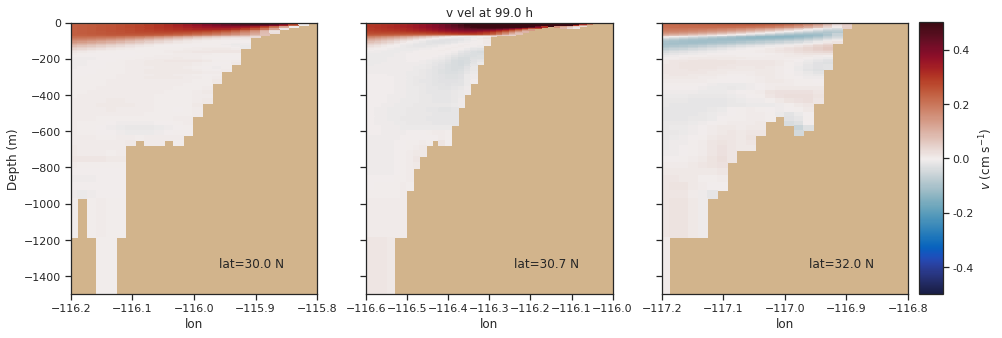

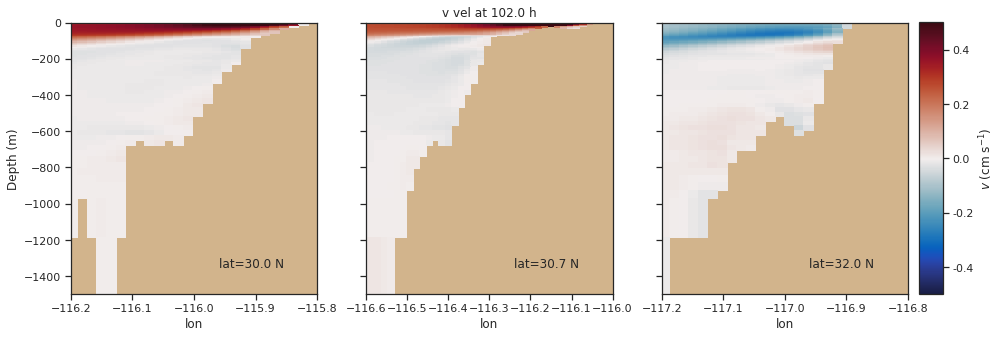

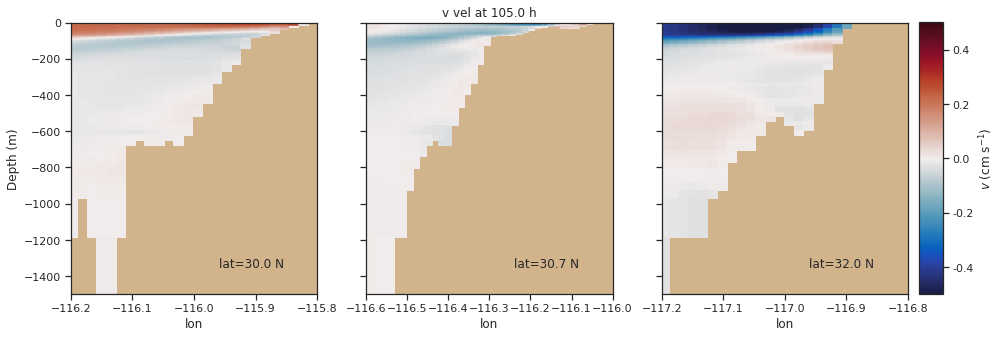

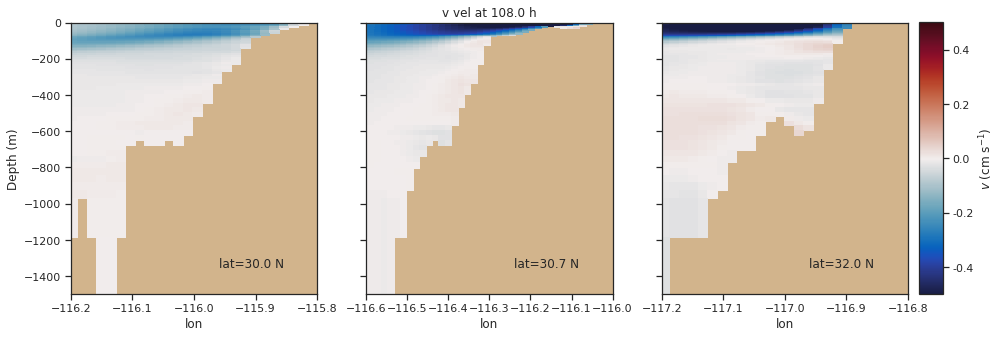

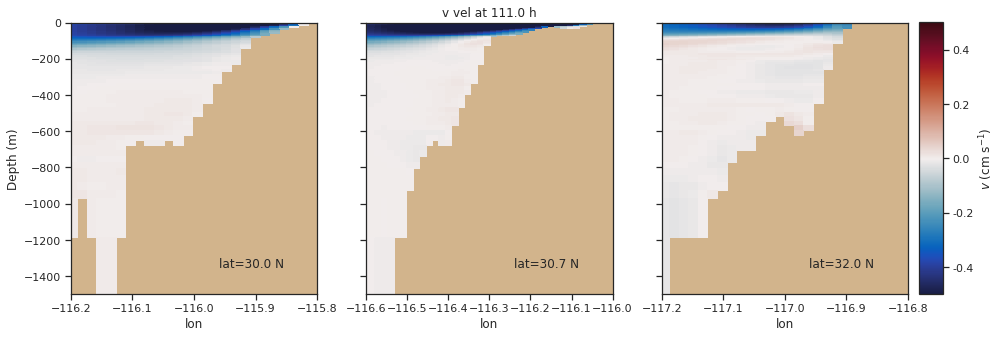

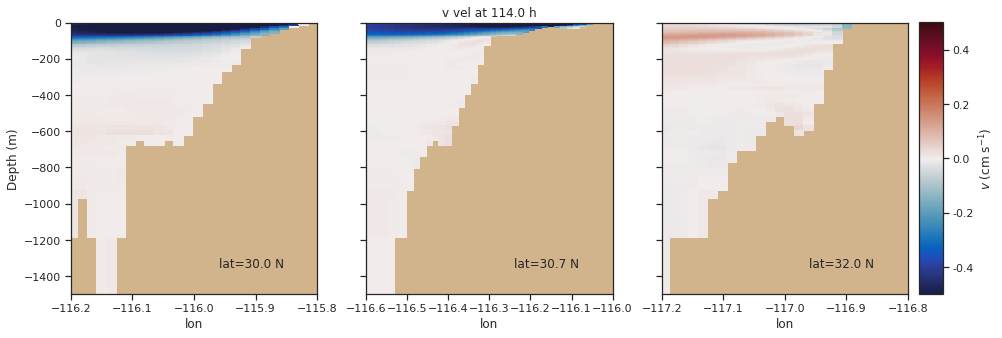

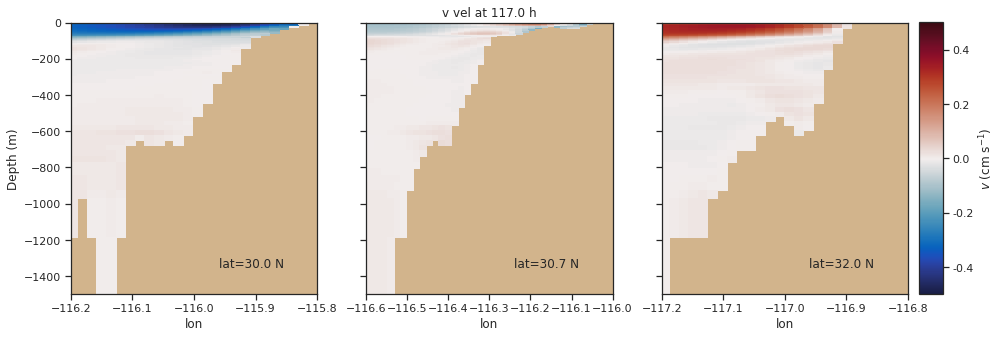

In [22]:
for ii in range(40):
    tt = ii*18
    fig, (ax,ax1,ax2) = plt.subplots(1,3,figsize=(15,5), sharey=True)
    for axx in [ax,ax1,ax2]:
        axx.set_facecolor('tan')
        axx.set_xlabel('lon')

    pc = ax.pcolormesh(lon, Z, 100*np.ma.masked_array(ds['VVEL'][tt,:,170+50,:], 
                                                  mask=mask[:,170+50,:]),
                      cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5)

    pc = ax1.pcolormesh(lon, Z, 100*np.ma.masked_array(ds['VVEL'][tt,:,170+100,:], 
                                                   mask=mask[:,170+100,:]),
                      cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5)

    pc = ax2.pcolormesh(lon, Z, 100*np.ma.masked_array(ds['VVEL'][tt,:,170+200,:], 
                                                   mask=mask[:,170+200,:]),
                      cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5)

    norm = mpl.colors.Normalize(vmin=-0.5, vmax=0.5)
    cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755]) 
    cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                      cax=cbar_ax, orientation='vertical', 
                      format='%1.1f', label='$v$ (cm s$^{-1}$)')
    
    ax.set_xlim(-116.2,-115.8)
    ax.set_ylim(-1500,0)

    ax1.set_xlim(-116.6,-116)
    ax2.set_xlim(-117.2,-116.8)
    ax.set_ylabel('Depth (m)')
    ax1.set_title('v vel at %1.1f h' %(tt*600/3600))
    ax.text(0.6,0.1,'lat=%1.1f N' %lat[170+50], transform=ax.transAxes)
    ax1.text(0.6,0.1,'lat=%1.1f N' %lat[170+100], transform=ax1.transAxes)
    ax2.text(0.6,0.1,'lat=%1.1f N' %lat[170+200], transform=ax2.transAxes)
    tstr = str(tt).zfill(3)
    plt.savefig('v_febTS_%s.png' %tstr, format='png')
    plt.show()